In [26]:
import numpy as np

# логарифмическая функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return np.log2(1 + np.exp(-M))


# производная логарифмической функции потерь по вектору w
def df(w, x, y):
    M = np.dot(w, x) * y
    return -(np.exp(-M) * x.T * y) / ((1 + np.exp(-M)) * np.log(2))


data_x = [(5.8, 1.2), (5.6, 1.5), (6.5, 1.5), (6.1, 1.3), (6.4, 1.3), (7.7, 2.0), (6.0, 1.8), (5.6, 1.3), (6.0, 1.6), (5.8, 1.9), (5.7, 2.0), (6.3, 1.5), (6.2, 1.8), (7.7, 2.3), (5.8, 1.2), (6.3, 1.8), (6.0, 1.0), (6.2, 1.3), (5.7, 1.3), (6.3, 1.9), (6.7, 2.5), (5.5, 1.2), (4.9, 1.0), (6.1, 1.4), (6.0, 1.6), (7.2, 2.5), (7.3, 1.8), (6.6, 1.4), (5.6, 2.0), (5.5, 1.0), (6.4, 2.2), (5.6, 1.3), (6.6, 1.3), (6.9, 2.1), (6.8, 2.1), (5.7, 1.3), (7.0, 1.4), (6.1, 1.4), (6.1, 1.8), (6.7, 1.7), (6.0, 1.5), (6.5, 1.8), (6.4, 1.5), (6.9, 1.5), (5.6, 1.3), (6.7, 1.4), (5.8, 1.9), (6.3, 1.3), (6.7, 2.1), (6.2, 2.3), (6.3, 2.4), (6.7, 1.8), (6.4, 2.3), (6.2, 1.5), (6.1, 1.4), (7.1, 2.1), (5.7, 1.0), (6.8, 1.4), (6.8, 2.3), (5.1, 1.1), (4.9, 1.7), (5.9, 1.8), (7.4, 1.9), (6.5, 2.0), (6.7, 1.5), (6.5, 2.0), (5.8, 1.0), (6.4, 2.1), (7.6, 2.1), (5.8, 2.4), (7.7, 2.2), (6.3, 1.5), (5.0, 1.0), (6.3, 1.6), (7.7, 2.3), (6.4, 1.9), (6.5, 2.2), (5.7, 1.2), (6.9, 2.3), (5.7, 1.3), (6.1, 1.2), (5.4, 1.5), (5.2, 1.4), (6.7, 2.3), (7.9, 2.0), (5.6, 1.1), (7.2, 1.8), (5.5, 1.3), (7.2, 1.6), (6.3, 2.5), (6.3, 1.8), (6.7, 2.4), (5.0, 1.0), (6.4, 1.8), (6.9, 2.3), (5.5, 1.3), (5.5, 1.1), (5.9, 1.5), (6.0, 1.5), (5.9, 1.8)]
data_y = [-1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1]

x_train = np.array([[1, x[0], x[1], 0.8*x[0], (x[0]+x[1])/2] for x in data_x])
y_train = np.array(data_y)

n_train = len(x_train)  # размер обучающей выборки
w = np.zeros(len(x_train[0]))  # начальные нулевые весовые коэффициенты
nt = np.array([0.5] + [0.01] * (len(w) - 1))  # шаг обучения для каждого параметра w0, w1, w2, ...
lm = 0.01  # значение параметра лямбда для вычисления скользящего экспоненциального среднего
N = 500  # число итераций алгоритма SGD
batch_size = 10 # размер мини-батча (величина K = 10)
lm_l1 = 0.05 # параметр лямбда для L1-регуляризатора

Qe = np.mean([loss(w, x, y) for x, y in zip(x_train[:batch_size], y_train[:batch_size])]) # начальное значение среднего эмпирического риска
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел

for _ in range(N):
    k = np.random.randint(0, n_train - batch_size - 1)

    Qk = 0
    diff_Qk = []
    for i in range(k, k + batch_size):
        Qk += loss(w, x_train[i], y_train[i])
        diff_Qk.append(df(w, x_train[i], y_train[i]))
    Qk /= batch_size
    diff_Qk = np.mean(diff_Qk, axis=0)

    w_curr = w.copy()
    w_curr[0] = 0
    w = w - nt * (diff_Qk + lm_l1 * np.sign(w_curr))
    Qe = lm * Qk + (1 - lm) * Qe

Q = np.mean([(np.dot(w, x) * y < 0) for x, y in zip(x_train, y_train)])

print(w)
print(Qe)
print(Q)

[-3.67012934  0.12260854  0.66859677  0.05038683  0.39510265]
0.7925973483927081
0.09


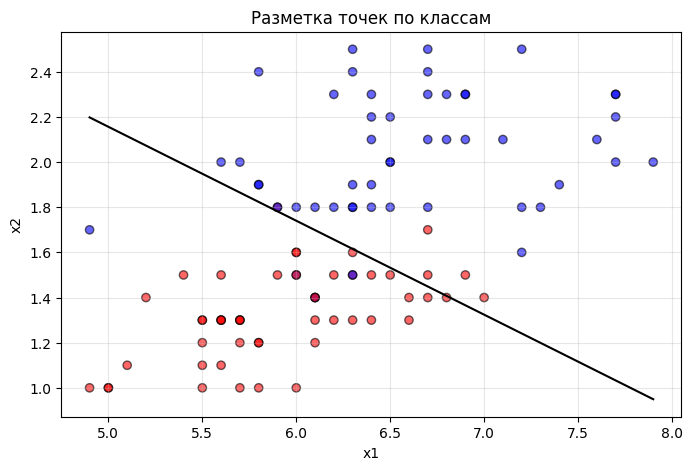

In [31]:
import matplotlib.pyplot as plt

x_coord = [p[0] for p in data_x]
y_coord = [p[1] for p in data_x]

colors = ['red' if label == -1 else 'blue' for label in data_y]


data_x_np = np.array(data_x)
x_range = np.linspace(data_x_np[:, 0].min(), data_x_np[:, 0].max(), 100)
divide_line_y = [-(2*w[0] + (2*w[1] + 1.6 * w[3] + w[4]) * x) / (2 * w[2] + w[4]) for x in x_range]
plt.figure(figsize=(8, 5))
plt.plot(x_range, divide_line_y, c='k')
plt.scatter(x_coord, y_coord, alpha=0.6, c=colors, edgecolors='k')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Разметка точек по классам")
plt.grid(True, alpha=0.3)
plt.show()